In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [38]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/experiments/check_diagonal_values'
A_diagonal = np.load(os.path.join(path, 'A_diagonal.npz'))['A_diagonal'].squeeze()
ic0_diagonal = np.load(os.path.join(path, 'ic0_diagonal.npz'))['ic0_diagonal'].squeeze()
L_llt_diagonal = np.load(os.path.join(path, 'L_diagonal_llt_loss.npz'))['L_diagonal'].squeeze()
L_naive_diagonal = np.load(os.path.join(path, 'L_diagonal_naive_loss.npz'))['L_diagonal'].squeeze()

L_gnn_diagonal = np.sqrt(A_diagonal)

diags = [A_diagonal, ic0_diagonal, L_gnn_diagonal, L_naive_diagonal, L_llt_diagonal]
names = ['A', 'IC0', 'GNN', 'PreCor w/ naive', 'PreCor w/ llt']
color = ['black', 'red', 'orange', 'green', 'blue']

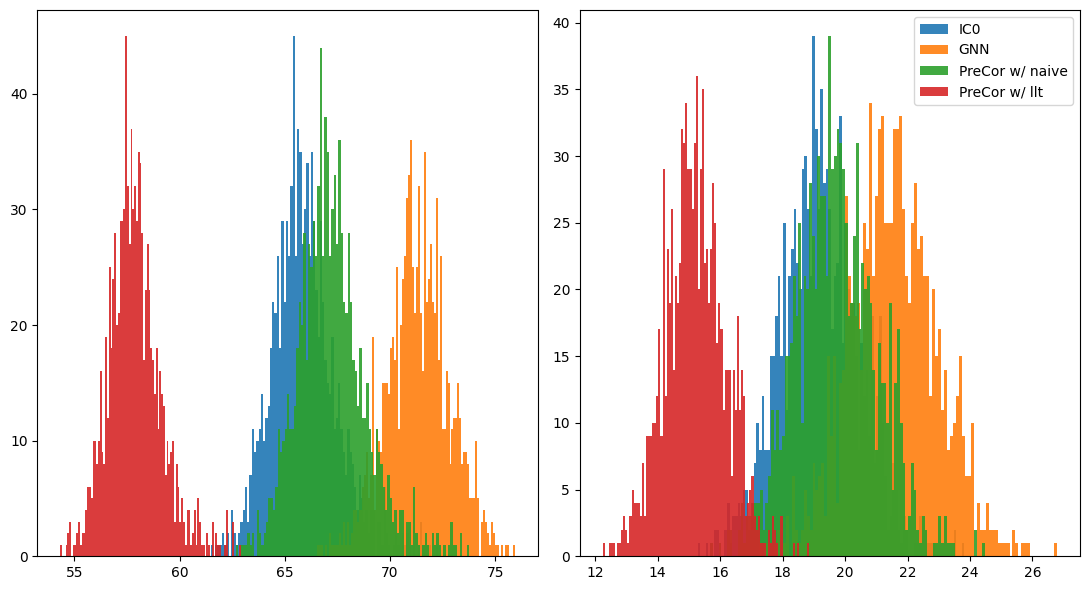

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(11, 6))
for d, n, c in zip(diags, names, color):
    if n == 'A':
        continue
    mean, std = d.mean(axis=0), d.std(axis=0)
#     print(f'{n}\n  mean = {mean:.3f}, std = {std:.3f}')
    axes[0].hist(mean, bins=100, label=n, alpha=.9)
    axes[1].hist(std, bins=100, label=n, alpha=.9)
#     axes[0].plot(mean, label=n, color=c)
#     axes[1].plot(std, label=n)
#     axes[0].fill_between(range(1024), mean-std, mean+std, color=c, alpha=.3)
#     axes[1].fill_between(range(1024), mean-std, mean+std)
    
    
#     axes[0].scatter(range(1024), mean, label=n)
#     axes[1].scatter(range(1024), std, label=n)
    

plt.legend();
plt.tight_layout()
# plt.xscale('log');

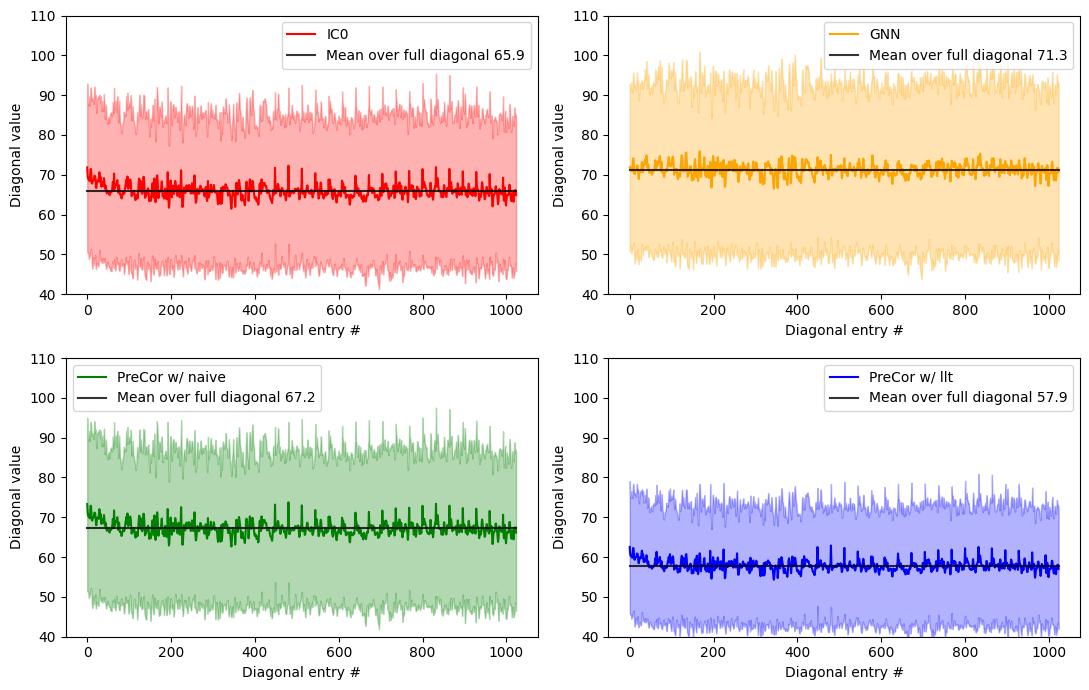

In [60]:
diags = [ic0_diagonal, L_gnn_diagonal, L_naive_diagonal, L_llt_diagonal]
names = ['IC0', 'GNN', 'PreCor w/ naive', 'PreCor w/ llt']
color = ['red', 'orange', 'green', 'blue']

fig, axes = plt.subplots(2, 2, figsize=(11, 7))
axes = axes.flatten()

for i, d, n, c in zip(range(4), diags, names, color):
    mean, std = d.mean(axis=0), d.std(axis=0)
    axes[i].plot(mean, label=n, color=c)
    axes[i].plot([np.mean(mean)]*1024, color='k', alpha=.8, label=f'Mean over full diagonal {np.mean(mean):.1f}')
    axes[i].fill_between(range(1024), mean-std, mean+std, color=c, alpha=.3)
    axes[i].legend()
    axes[i].set_ylim(40, 110)
    axes[i].set_ylabel('Diagonal value')
    axes[i].set_xlabel('Diagonal entry #')
    
plt.tight_layout()
# plt.xscale('log');

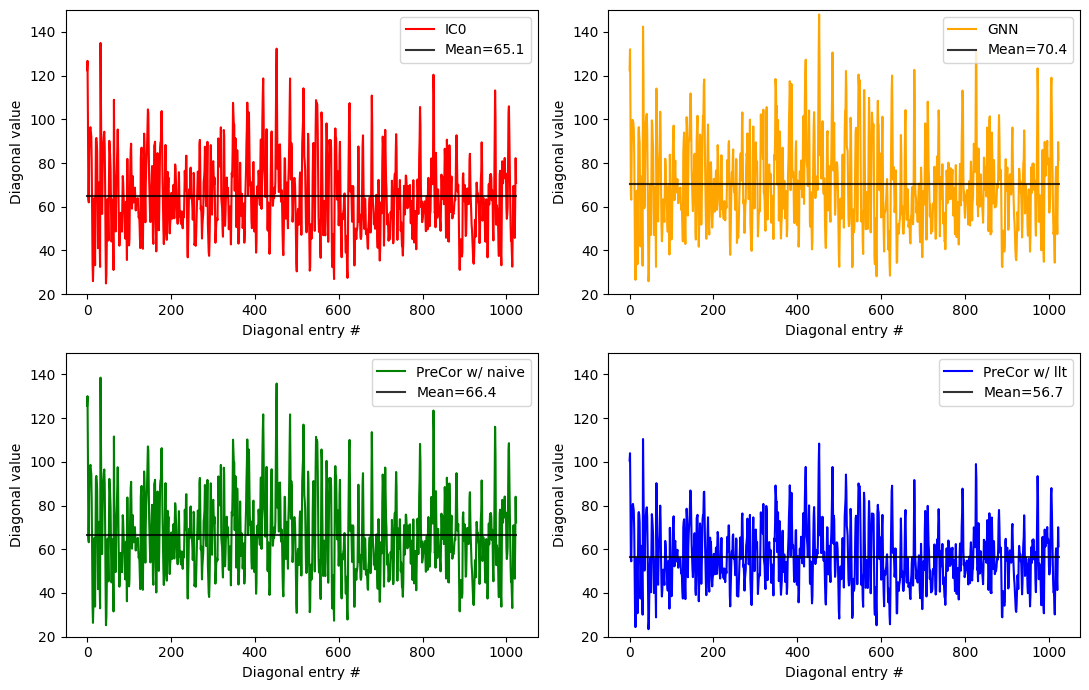

In [59]:
diags = [ic0_diagonal[0, ...], L_gnn_diagonal[0, ...], L_naive_diagonal[0, ...], L_llt_diagonal[0, ...]]
names = ['IC0', 'GNN', 'PreCor w/ naive', 'PreCor w/ llt']
color = ['red', 'orange', 'green', 'blue']

fig, axes = plt.subplots(2, 2, figsize=(11, 7))
axes = axes.flatten()

for i, d, n, c in zip(range(4), diags, names, color):
    mean, std = d.mean(axis=0), d.std(axis=0)
    axes[i].plot(d, label=n, color=c)
    axes[i].plot([np.mean(mean)]*1024, color='k', alpha=.8, label=f'Mean={np.mean(mean):.1f}')
#     axes[i].fill_between(range(1024), mean-std, mean+std, color=c, alpha=.3)
    axes[i].legend()
    axes[i].set_ylim(20, 150)
    axes[i].set_ylabel('Diagonal value')
    axes[i].set_xlabel('Diagonal entry #')
    
plt.tight_layout()
# plt.xscale('log');

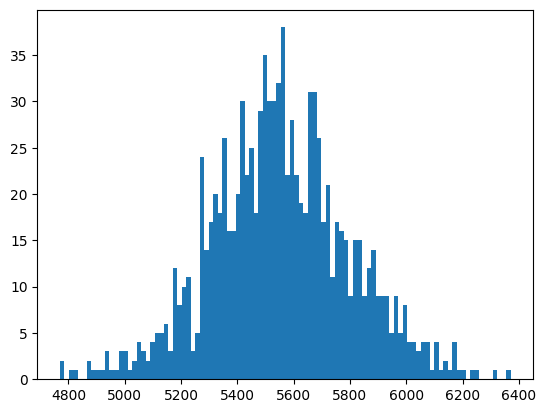

In [8]:
plt.hist(A_diagonal.mean(axis=0).squeeze(), bins=100);

In [6]:
A_diagonal.mean(axis=0).squeeze().shape

(1024,)

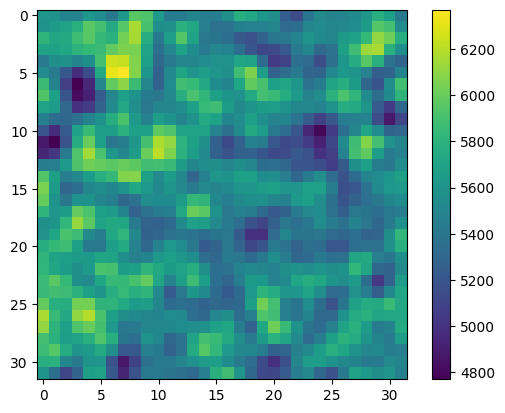

In [19]:
plt.imshow(A_diagonal.mean(axis=0).reshape(32, 32))
plt.colorbar();

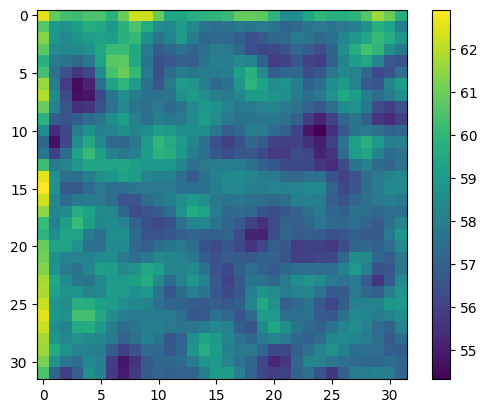

In [20]:
plt.imshow(L_llt_diagonal.mean(axis=0).reshape(32, 32))
plt.colorbar();

In [ ]:
plt